# Linear Regression

## Learning Objectives
- Understand Linear Regression modelling and apply it to a real dataset 
- Explore and analyse a real dataset Bikeshare Dataset to predict rental rate 
- Implement an ordinary linear regression model on a dataset satisfying linearity assumption using scikit-learn library.
- Understand and identify multicollinearity in a multiple regression.

<a id="introduce-the-bikeshare-dataset"></a>
## Introduce the Capital Bikeshare Data Set
---

- This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal informat (http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)
- The goal is to predict how many bikes will be rented depending on the weather and the day.
- Here are the list of features that we are going to use:
 * datetime - hourly date + timestamp  
 * season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
 * holiday - whether the day is considered a holiday
 * workingday - whether the day is neither a weekend nor holiday
 * weather:
        1. Clear, Few clouds, Partly cloudy, Partly cloudy 
        2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
 * temp - temperature in Celsius
 * atemp - "feels like" temperature in Celsius
 * humidity - relative humidity
 * windspeed - wind speed
 * casual - number of non-registered user rentals initiated
 * registered - number of registered user rentals initiated
 * count - number of total rentals

## Introduction to Linear Regression
A linear regression model predicts the value of a continuous target variable as a weighted sum of the input features. The target variable is denoted as $y$ and the input features are denoted as a feature vector $x$. It is assumed that $y$ is a linear function of one or more input features with some random noise.
The relationship between each input features $x^{(1)}, x^{(2)}, ..., x^{(d)}$ and the target $y$ for one observation in the sample is:
\begin{equation}
y=\beta_{0}+\beta_{1}x^{(1)}+\ldots+\beta_{d}x^{(p)}+\epsilon
\end{equation}
where $\beta_{j}$ are the learned feature weights or coefficients, $x^{(j)}$ are the input features and $\epsilon$ is the noise or error of the prediction. Each of the input features (e.g. $x^{(j)}$) has a highest degree of 1, therefore the equation represents a **linear** relationship between input and output target. A given set of weight values $\beta_{j}$ gives a predicted output target which will then be compared against the actual label of that observation. A `loss` function $loss(\hat{y}_i, y_i)$ is defined as the difference between the predicted target and the actual label for each training example $i$. It depends on which modeling problem we are trying to solve that we have different loss functions. In this linear regression problem we are going to use the Squared Error loss function which is the squared difference between predicted value and the actual label.
\begin{equation}
 loss = (\hat{y}_{i} - y_{i})^{2}
\end{equation}
The best weights or coefficients are the ones minimising the error or the difference between the predicted targets and the actual labels for all the training examples in the dataset (A side note: for now we use the training data as the ground for determining the best weights, we will revisit this defintion later on once we reach the definition of training error and test error). Therefore, we have to sum the loss over all training examples and calculate the Mean Squared Error (MSE) loss. This process of fitting the equation through all the data in the training examples is called training.
\begin{equation}
\hat{\boldsymbol{\beta}}=\arg\!\min_{\beta_0,\ldots,\beta_p}\sum_{i=1}^n(\hat{y}_{i}- y_{i})^{2}
\end{equation}

The above equation uses $argmin$ as a function to determine the set of $\beta$s that minimise the overall MSE.

The equation with the learned coefficients describe a line of best fit that minimises the difference between each actual points and the prediction values in a 2D space as in the below illustration. In a n-dimensional feature space, the equation describes a hyperplane.

<center><img src='./assets/estimation.png'></center>


## Linear Regression simple 1-D example
- This part illustrates a complete process on applying a machine learning model to a dataset. 
- Demonstrate the use of a simple linear regression model on a 1-dimensional toy dataset
- Use common libraries such as numpy, pandas, seaborn and scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")



We start off by collecting/ generating the data. Here we generate a random sample of 100 2-D points following a uniform distribution $\mathcal{N}(0,1)$ where the x-y coordinates related linearly to each other. There is random noise (e.g $\epsilon$) introduced into the data generation process to scatter the points out of an obvious straight line. This is also simulating the noise coming from our input data.

Text(0, 0.5, 'y')

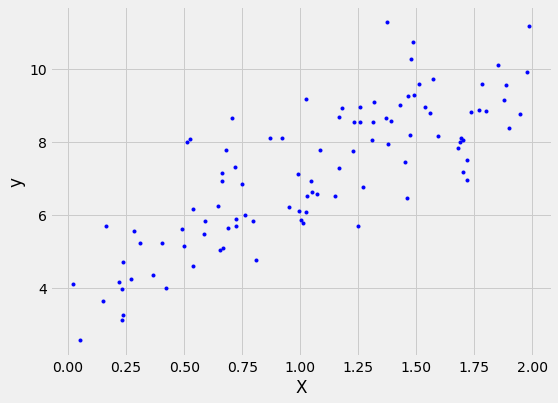

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# visually examine the data

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')

Using Machine Learning model in scikit-learn is quite straight-forward. We usually follow 2 processes: 
- instantiate an instance of the model, 
- then fit the model with the input-output data.

In [4]:
print(X.shape), print(y.shape)

(100, 1)
(100, 1)


(None, None)

In [5]:
# Create an instance of a Linear Regression model from our sckitlearn library
# and fit it through our data. The parameters are learned such that it minimises a loss function
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Once the model finishes training, we use it to predict the target from an unseen data point.

In [6]:
X_new = np.array([[0], [2]])
print(X_new.shape)
y_predict = lin_reg.predict(X_new)
print(y_predict)

(2, 1)
[[4.0736741 ]
 [9.90592312]]


The coefficients of the linear regression model can be accessed by the `coef_` and `intercept_` attributes of the model instance. In this example, since we only have 1-D data point, we can access $\beta_0$ and $\beta_1$ as below.

In [7]:
# Inspect the coefficient Beta_0 and Beta_1 of the line
# y = Beta_0 + x * Beta_1
lin_reg.coef_, lin_reg.intercept_

(array([[2.91612451]]), array([4.0736741]))

The below plots show the training data points (in blue) and the new test data points (in green) together with the line described by the learned model.

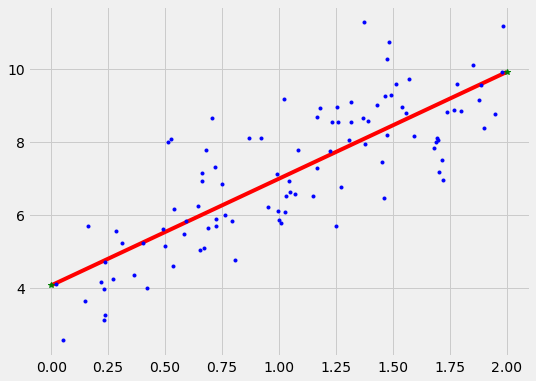

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X_new[0], y_predict[0], 'g*')
plt.plot(X_new[1], y_predict[1], 'g*')
plt.plot(X, y, 'b.')
plt.show()

#### Nonlinear relationship between features and target variable

Text(0, 0.5, 'y')

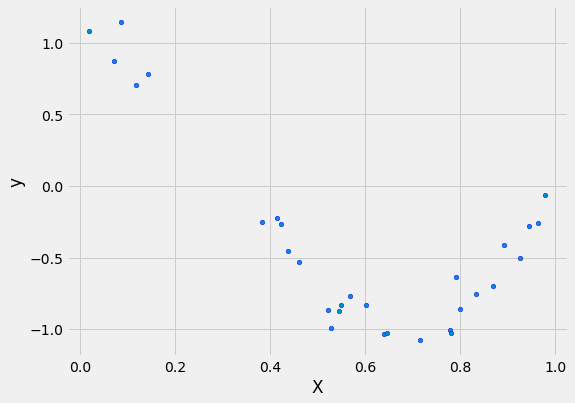

In [9]:
from sklearn.preprocessing import PolynomialFeatures
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel('X')
plt.ylabel('y')

In [10]:
X.shape

(30,)

In [11]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

We can try to transform our features into polynomial format and run this transformation on different number of order `degree`

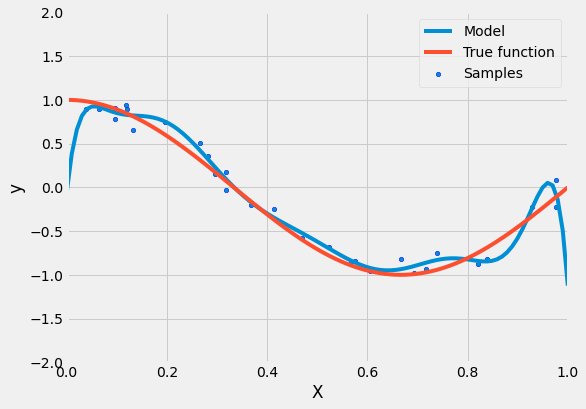

In [12]:
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = LinearRegression()

X_test = np.linspace(0, 1, 100)

X_train_poly = polynomial_features.fit_transform(X.reshape((-1,1)))
X_test_poly = polynomial_features.fit_transform(X_test.reshape((-1,1)))

#print(X_poly)
# training the model on traning set
linear_regression.fit(X_train_poly, y)


y_pred = linear_regression.predict(X_test_poly)


plt.plot(X_test, y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel('X')
plt.ylabel('y')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

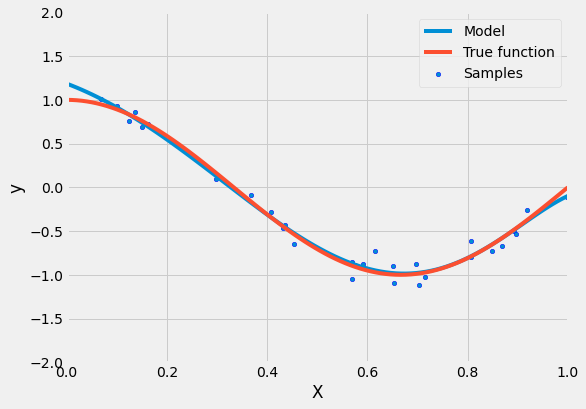

In [13]:
# Optional topic on Regularised model
from sklearn.linear_model import Ridge

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
ridge_model = Ridge(alpha=0.00001, solver='cholesky') # alpha controls how much you waant to regularise the model. alpha=0 is LinearRegression, larger value
# of alpha will compress the coefficients to be small and lead to a straight line (extremely underfit)

X_test = np.linspace(0, 1, 100)

X_train_poly = polynomial_features.fit_transform(X.reshape((-1,1)))
X_test_poly = polynomial_features.fit_transform(X_test.reshape((-1,1)))

#print(X_poly)
# training the model on traning set
ridge_model.fit(X_train_poly, y)


y_pred = ridge_model.predict(X_test_poly)


plt.plot(X_test, y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel('X')
plt.ylabel('y')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

From the above toy example, we hope you have an idea of what linear regression is and how to train a linear regression model on a dataset using scikit-learn library. Now we are going to see how to apply ML model in a real dataset. 

## Exploratory Data Analysis

When working with real dataset, there are a lot of processes that we need to go through in order to correctly apply an ML model to solve the problems. This deserves a separate chapter to describe the entire process. The below example sets out to demonstrate some key processes that we all have to go through in handling any data project. 

In [14]:
# Read the data and set the datetime as the index.
bikes = pd.read_csv('./data/bikeshare.csv')
#bikes=pd.read_csv('./data/bikeshare.csv', parse_dates=True , index_col='datetime')
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
# Check out the types of data in each of the column. This gives us an idea of which operations we should perform on each column and whether 
# we need to convert any column to new data structure.
bikes.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [16]:
# datetime is better represented as a datetime datatype
bikes['datetime'] = pd.to_datetime(bikes['datetime'])
#bikes.dtypes

In [17]:
bikes['hour'] = bikes['datetime'].dt.hour
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [18]:
# Check for missing data. This data has been cleaned so it does not have missing values
bikes.isnull().values.any()

False

Here are some of the initial findings:
- Each row or observation contains the values of each feature and the number of bikes rented during an hour, which is the target we want to predict
- There are 9 features in this dataset: **datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed**
- The target variable is: **count**, which is broken down into **casual** and **registered**

Rename the column `count` to `total_rentals` to avoid confusion with keywords conflict

In [29]:
# Use the .rename() method to rename count to total_rentals
bikes.rename(columns={'count':'total_rentals'}, inplace=True)
bikes.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9


Summer and Fall seems to have rental counts a bit higher than in Spring and Winter

<AxesSubplot:xlabel='season', ylabel='total_rentals'>

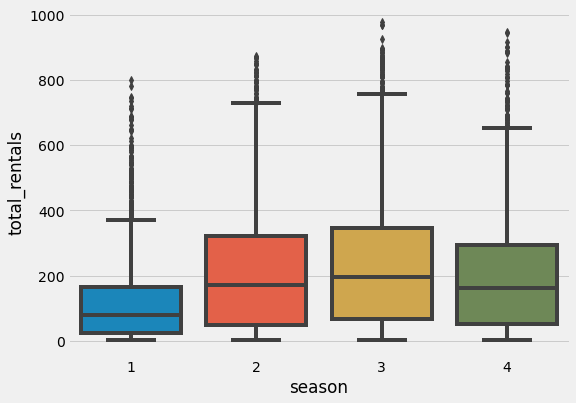

In [20]:
sns.boxplot(x = 'season',y = 'total_rentals',data = bikes)

There are very few rentals when the weather is not nice (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

<AxesSubplot:xlabel='weather', ylabel='total_rentals'>

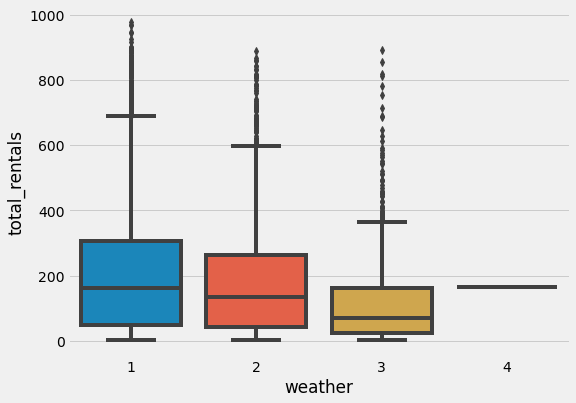

In [21]:
sns.boxplot(x = 'weather',y = 'total_rentals',data = bikes)

There is a clear difference between holiday and non-holiday rents. People rent bikes to work or school on non-holiday periods

holiday
0    2027668
1      57808
Name: total_rentals, dtype: int64


<AxesSubplot:ylabel='holiday'>

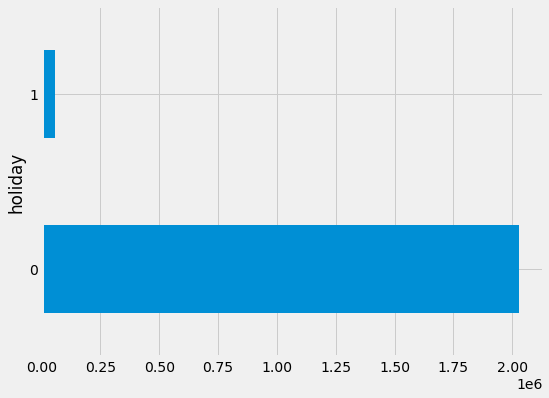

In [28]:
print(bikes.groupby('holiday')['total_rentals'].sum())
bikes.groupby('holiday')['total_rentals'].sum().plot.barh()

<AxesSubplot:xlabel='holiday', ylabel='total_rentals'>

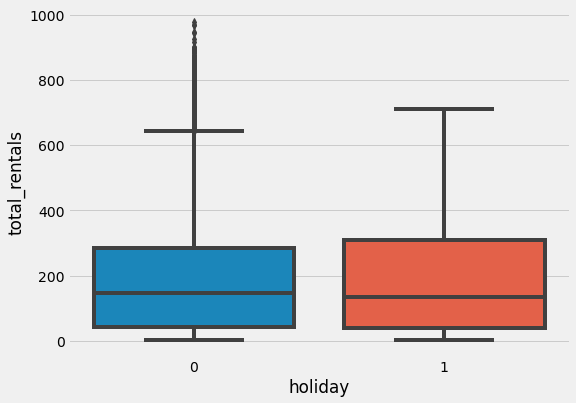

In [25]:
sns.boxplot(x = 'holiday',y = 'total_rentals',data = bikes)

We can do pairwise visualisation on the features to detect whether there is any interesting correlations between some of the features.
If a pair of features is highly correlated, we need to remove one of them from the input to the model to avoid colinearity.

In [22]:
# This might take some time to run, consider use the below cell
#sns.pairplot(bikes)

<AxesSubplot:>

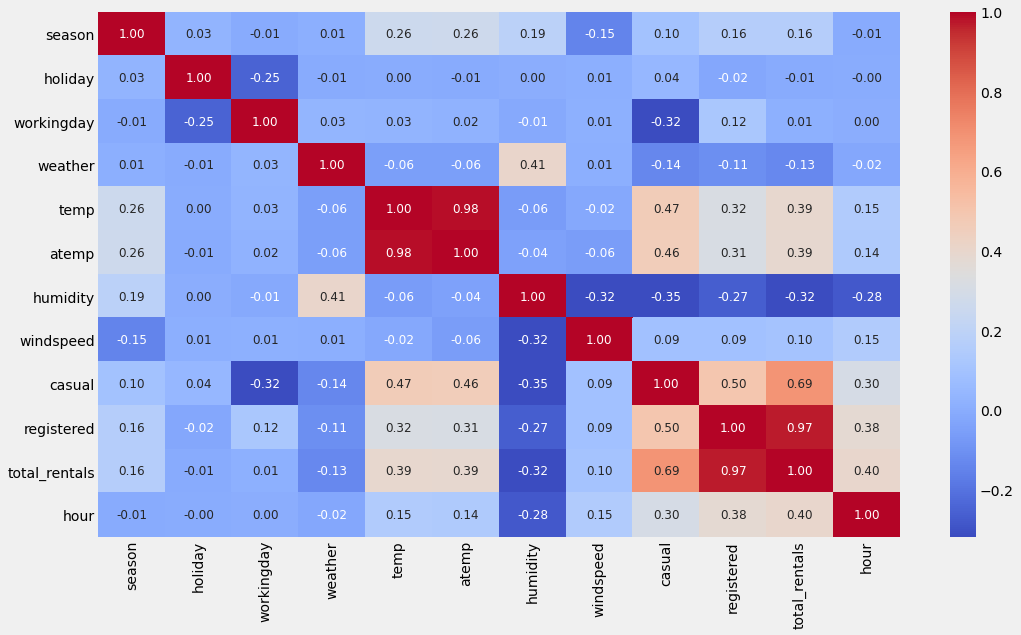

In [23]:
# Use heatmap as a different method to observe the correlation
# Change the colour map from -1.0 to 1.0
plt.figure(figsize = (16,9)) # change the size of heatmap
sns.heatmap(bikes.corr(), ## this is correlation between features, should not normalise them to -1 to 1, or mess up the values
            cmap='coolwarm', 
            annot=True, 
            robust=True, 
            fmt=".2f",
            annot_kws={'size':12}
           )

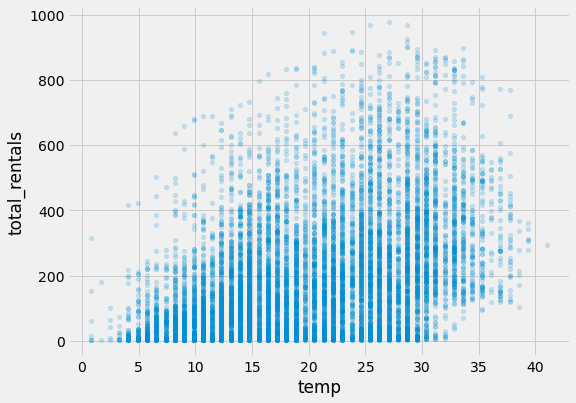

In [24]:
# Try out some simple visualisation to see the relationship between some variables and the target
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);

We can visualise the distribution of some features, there maybe outliers that we need to remove in order for the model not trying to fit through these points

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'total_rentals'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

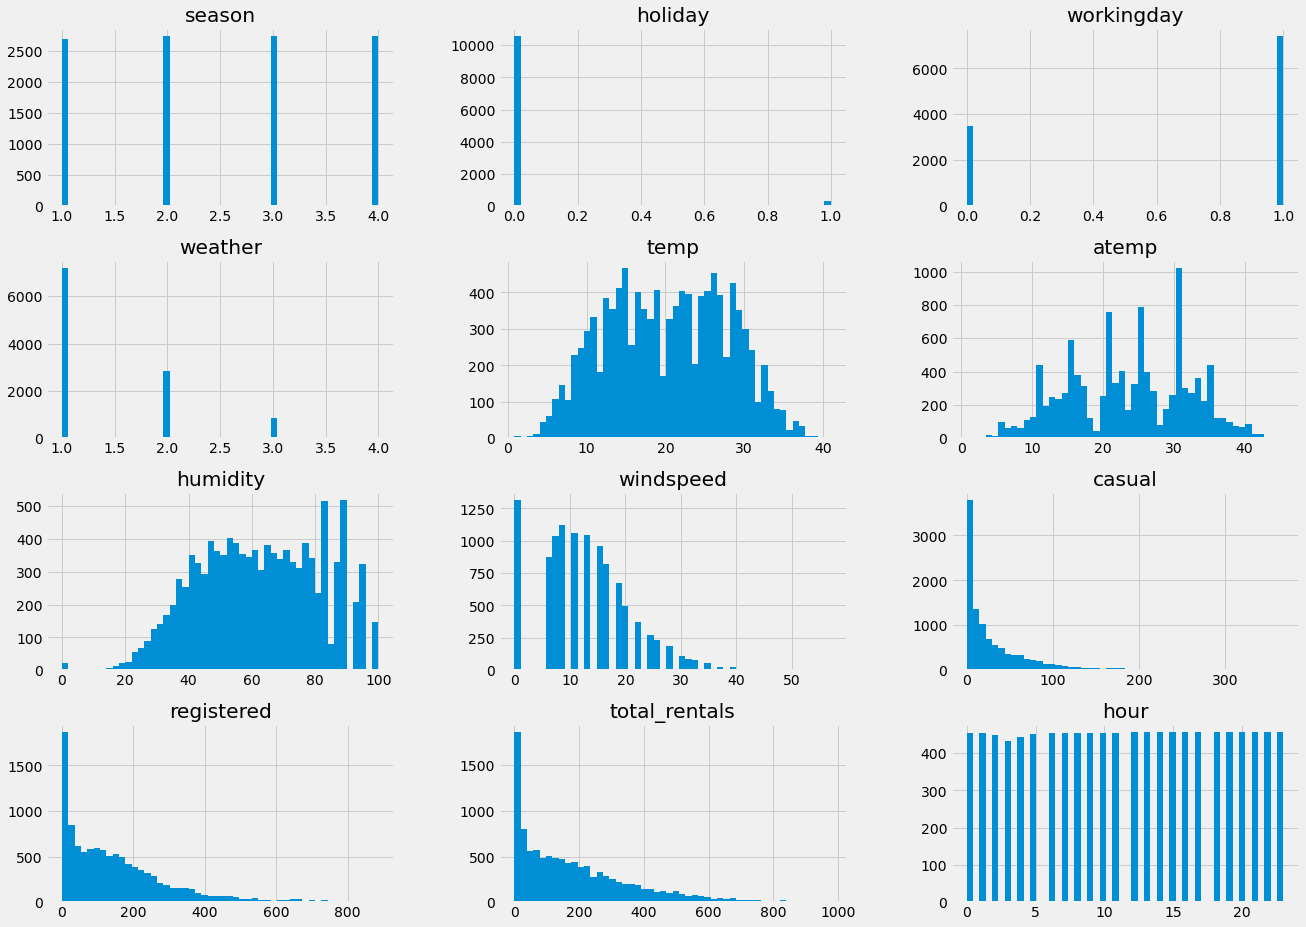

In [25]:
bikes.hist(bins=50, figsize=(20,15)) 

From the above linear regression equation, we want to find a set of coefficients that best predict the total rentals. The features in our input are temperature, windspeed, holiday etc...
An example would be something like this:

$total\_rentals = 20 + -2 \cdot temp + -3 \cdot windspeed\ +\ ...\ +\ 0.1 \cdot registered$

#### Let's build a Linear Regression Model in sklearn to apply to the bikeshare dataset
- Select the appropriate features to give to the model as inputs
- Perform feature engineering to transform the data types into the right format to be useful for the model to learn
- Compare train and test error. Eventhough we mentioned in the introduction that the best set of coefficients is the one that minimises the train MSE, test MSE is actually more important in evaluating the performance of an ML model. It shows you how your model is going to perform on new unseen data which is eventually what it needs to perform in reality. Therefore we are going to check on both the train error, as well as the test error for every modification steps and for new model selection.

In [26]:
# Import LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

import numpy as np

## We need to define a train function to reduce the amount of typing
def train_linear(features, label, test_size=0.2):
    """
    Ins: features, labels, test_size
    Outs: None but print out train MSE, test MSE
    """
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=test_size, random_state=42)
    # Instantiate a linear regression model and fit it through our training data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    # Make predictions on our training
    training_preds = linreg.predict(X_train)
    
    # Calculate and print the MSE
    print('Training RMSE:', np.sqrt(metrics.mean_squared_error(y_train, training_preds)))
    # Now apply the trained model on our test data and calculate the test error
    test_preds = linreg.predict(X_test)
    print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_preds)))


In [27]:
# Create the feature vector X and the target y. 
# for now just select all the features and in its current form
feature_cols = ['temp','atemp','humidity','windspeed', 'holiday', 'workingday', 'weather', 'season' ]
X = bikes[feature_cols]
y = bikes['total_rentals']

In [28]:
print(X.shape)
print(y.shape)

(10886, 8)
(10886,)


In [29]:
train_linear(X, y)

Training RMSE: 156.00646161660097
Test RMSE: 154.61828705937765


#### Exercise 1:
- Try out different set of features and report the test RMSE 

For continuous variable prediction, accuracy is not a good metrics, since we can never have the predicted the value to match 100% with the target value (remember the noise?). Therefore, we need to look at the errors that the prediction has and try to reduce it.
Looking at a single test MSE or train MSE is not very informative as they are relative errors which describes the difference between the predicted outputs and the actual outputs. We normally want to look at the trend of these errors as trying out different models or after certain modifications to the features, then select the model or the configuration that yields the lowest train and test error. More on this later. For now, there are two important things that we want you to have in mind:
- Know how to create a train function to take in input features and create a model to predict the output labels
- The current test MSE and train MSE are approximately 1.59 and 1.46 respectively when you give the model all the input features without any modification or preprocessing steps

Let's use this as a baseline and we are going to see how other models and feature engineering techniques that you are going to learn later perform against this naive linear regression model.

### Regression Evaluation Metrics:

With $n$ is the number of training examples, we have the following error metrics:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
- Easy to understand
- Does not highlight the effect of outliers

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
- The squared part is used to make derivative easier to deal with in some optimization algorithms
- Highlight the significance of outliers

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
- Give the benefit that the errors' unit is the same as of the targets
- Still maintain the squared to highlight the significance of outliers

In scikit-learn:
```
>>> print('MAE:', metrics.mean_absolute_error(true, pred))
>>> print('MSE:', metrics.mean_squared_error(true, pred))
>>> print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
```

### Feature Engineering

As we see from the above results, the columns `season`,`holiday`,`workingday` and `weather` should be of `categorical` data type.But the current data type is `integer` for those columns. Let us transform the dataset in the following ways so we can make it more useful for the model to learn.

- Extract more information from the current datetime by creating new columns `date`, `hour`, `weekDay`, `month` from `datetime` column.
- Convert the datatype of `season`, `holiday`, `workingday` and `weather` to category.
- Drop the datetime column as we already extracted useful features from it.
- Drop the `atemp` column because it conveys the same information as the `temp` column

In [30]:
np.unique( bikes['datetime'].dt.weekday )

array([0, 1, 2, 3, 4, 5, 6])

In [31]:
bikes['datetime'].dt.date.head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: datetime, dtype: object

In [32]:
#bikes["date"] = bikes.datetime.apply(lambda x : x.split()[0])
#bikes["hour"] = bikes.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
#bikes["year"] = bikes.datetime.apply(lambda x : x.split()[0].split("-")[0])
#bikes["weekday"] = bikes.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
#bikes["month"] = bikes.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

bikes['date'] = bikes.datetime.dt.date
bikes['year'] = bikes.datetime.dt.year
bikes['weekday'] = bikes.datetime.dt.weekday
bikes['month'] = bikes.datetime.dt.month
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,hour,date,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011-01-01,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011-01-01,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011-01-01,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011-01-01,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011-01-01,2011,5,1


In [33]:
bikes.dtypes

datetime         datetime64[ns]
season                    int64
holiday                   int64
workingday                int64
weather                   int64
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
casual                    int64
registered                int64
total_rentals             int64
hour                      int64
date                     object
year                      int64
weekday                   int64
month                     int64
dtype: object

In [34]:
# Classify our features into categorical and numerical, at the same time we will drop some of the columns 
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"total_rentals","datetime","date","registered", "atemp"]

In [35]:
for var in categoricalFeatureNames:
    bikes[var] = bikes[var].astype("category")

In [36]:
bikes.dtypes

datetime         datetime64[ns]
season                 category
holiday                category
workingday             category
weather                category
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
casual                    int64
registered                int64
total_rentals             int64
hour                   category
date                     object
year                   category
weekday                category
month                  category
dtype: object

In [37]:
X = bikes.drop(dropFeatures, axis=1)

In [38]:
# Confirm again on the feature vectors of our training data
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'hour', 'year', 'weekday', 'month'],
      dtype='object')

/Users/khuongtran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rentals', ylabel='Density'>

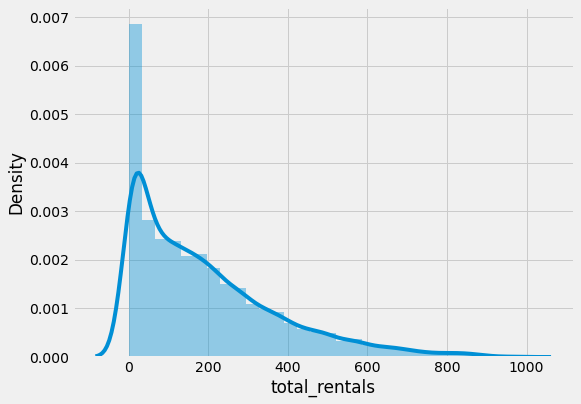

In [39]:
# The distribution is heavily skewed toward the right
sns.distplot(bikes['total_rentals'],kde = True,bins = 30)

/Users/khuongtran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rentals', ylabel='Density'>

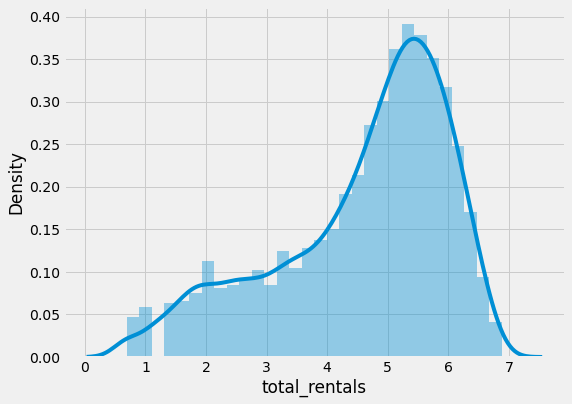

In [40]:
# We need to do a log transformation to pull the distribution to be as close to normal as possible
sns.distplot(np.log1p(bikes['total_rentals']),kde = True,bins = 30)

In [41]:
# Therefore we transform our labels using log transformation
# the log1p calculate more accurately for small value (~0)
#y = np.log1p(bikes['total_rentals'])
y = bikes['total_rentals']
#X = X.drop('atemp', axis=1)
## Let's rerun the Linear Regression model training again on transformed features and output
## The MSE is getting better for both training and testing
train_linear(X, y)

Training RMSE: 141.82937166643873
Test RMSE: 141.32465045709174


Voila, with just a few simple pre-processing steps to engineer the feature vectors, we are able to improve our test MSE and train MSE by almost 25%, which is a significant amount of improvement. 
Let's learn one more techniques to handle categorical variable called `one-hot encoding`.

### One hot encoding ###

Categorical data are represented using integers and hence some ordinal relationships may be wrongly interpreted by the learning algorithms.
For example if there are five categories 'A', 'B', 'C', 'D' and 'E' that do not have any ordinal meanings, interprete them using integers from 1 to 5 may accidentially introduce comparability. Therefore, one-hot encoding can represent each of these categories using 5 binary vectors,or to be useful to the ML model, 4 of them are going to be used as the 5th vector can be infered from the first four. This is to remove collinearity between input features. Pandas has an option to remove this redundant column.

For example, the season column which contains 4 integers: 1 - Spring, 2 - Summer, 3 - Autumn and 4- Winter can be represented as 4 binary vectors:
- 1: [1, 0, 0, 0]
- 2: [0, 1, 0, 0]
- 3: [0, 0, 1, 0]
- 4: [0, 0, 0, 1]

In [42]:
#bikes.season: perform comparsion between season 1 and season 4, which should not have order
bikes['season'][1] < bikes['season'][10884]

True

In [43]:
# pandas get_dummies convert the categorical season column into 4 binary vectors representation, drop_first option if set to True to remove the first column,
# leave 3 of them for the input to the model
pd.get_dummies(bikes["season"],prefix='season')

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
10881,0,0,0,1
10882,0,0,0,1
10883,0,0,0,1
10884,0,0,0,1


In [44]:
bikes_one_hot = pd.get_dummies(bikes, columns=['season'], prefix = ['season'], drop_first=True)
bikes_one_hot.tail(10)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,hour,date,year,weekday,month,season_2,season_3,season_4
10876,2012-12-19 14:00:00,0,1,1,17.22,21.210,50,12.9980,33,185,218,14,2012-12-19,2012,2,12,0,0,1
10877,2012-12-19 15:00:00,0,1,1,17.22,21.210,50,19.0012,28,209,237,15,2012-12-19,2012,2,12,0,0,1
10878,2012-12-19 16:00:00,0,1,1,17.22,21.210,50,23.9994,37,297,334,16,2012-12-19,2012,2,12,0,0,1
10879,2012-12-19 17:00:00,0,1,1,16.40,20.455,50,26.0027,26,536,562,17,2012-12-19,2012,2,12,0,0,1
10880,2012-12-19 18:00:00,0,1,1,15.58,19.695,50,23.9994,23,546,569,18,2012-12-19,2012,2,12,0,0,1
10881,2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012-12-19,2012,2,12,0,0,1
10882,2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012-12-19,2012,2,12,0,0,1
10883,2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012-12-19,2012,2,12,0,0,1
10884,2012-12-19 22:00:00,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2012-12-19,2012,2,12,0,0,1
10885,2012-12-19 23:00:00,0,1,1,13.12,16.665,66,8.9981,4,84,88,23,2012-12-19,2012,2,12,0,0,1


In [45]:
bikes.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,hour,date,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011-01-01,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011-01-01,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011-01-01,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011-01-01,2011,5,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,2011-01-01,2011,5,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,2011-01-01,2011,5,1
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,2011-01-01,2011,5,1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,2011-01-01,2011,5,1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,2011-01-01,2011,5,1


In [46]:
X = bikes_one_hot.drop(dropFeatures, axis=1)
y = np.log1p(bikes['total_rentals'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Instantiate a linear regression model and fit it through our training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions on our training
training_preds = linreg.predict(X_train)
print('Training MSE:', metrics.mean_squared_error(y_train, training_preds))
# Now apply the trained model on our test data
test_preds = linreg.predict(X_test)
print('Test MSE:', metrics.mean_squared_error(y_test, test_preds))

Training MSE: 1.024428950529451
Test MSE: 1.0165054306581174


Eventhough the test MSE after one-hot encoding is not improved much compared to previous feature engineering steps, however just one simple function call to encode the categorical variable already worths a few percent improvement to the test error which is equally satisfying. 

In [50]:
bikes_one_hot = pd.get_dummies(bikes, 
                               columns=['season','weather', 'hour', 'year', 'weekday', 'month'], 
                               prefix = ['season', 'weather', 'hour', 'year', 'weekday', 'month'], drop_first=True)
bikes_one_hot.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,total_rentals,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = bikes_one_hot.drop(dropFeatures, axis=1)
y = bikes['total_rentals']

train_linear(X,y)

Training RMSE: 100.17586572861454
Test RMSE: 100.17403606231028


## Pros/ Cons of Linear Regression
Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is in general not competitive with other ML models.


In [52]:
X = bikes[['temp', 'season', 'weather', 'humidity']]
y = bikes['total_rentals']

train_linear(X,y)

Training RMSE: 156.28261219590038
Test RMSE: 154.88153824675462


In [53]:
X = bikes_one_hot[ bikes_one_hot.columns[bikes_one_hot.columns.str.startswith('hour')] ]
#X = bikes[bikes_one_hot.columns.str.startswith('hour')]
y = bikes['total_rentals']

train_linear(X, y)

Training RMSE: 125.37261101652557
Test RMSE: 128.26143977587967


#### Use RandomForestRegressor pull RMSE down to 53!!

In [54]:
from sklearn.ensemble import RandomForestRegressor

X = bikes_one_hot.drop(dropFeatures, axis=1)
y = bikes['total_rentals']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)

# Grid Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [55]:
print(best_parameters)

{'max_features': 'auto', 'n_estimators': 250}


In [56]:
regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)

# Predicting the values 

y_pred = regressor.predict(X_test) 

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

53.36112021957763

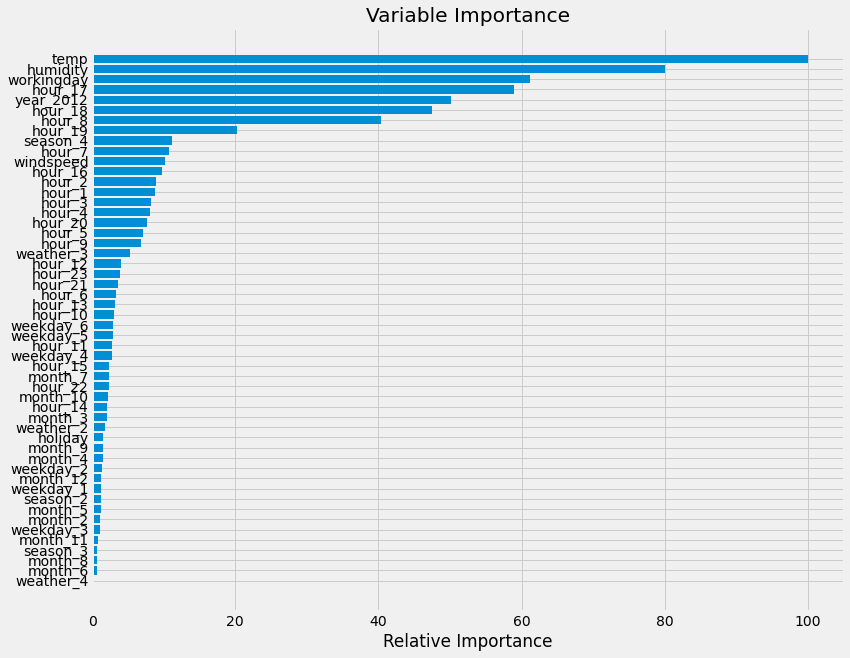

In [57]:
feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Polynomial Features
- order 2 is ok to run
- order 4 is taking forever to run!!!

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X = bikes_one_hot.drop(dropFeatures, axis=1)
y = bikes['total_rentals']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)


X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

# training the model on traning set
lr_model.fit(X_train_poly, y_train)

# make the prediction
y_pred = lr_model.predict(X_test_poly)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

51.315966429960056


In [59]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

51.315966429960056


In [60]:
from sklearn.model_selection import cross_val_score

lr = linear_model.LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

print(np.sqrt(-scores))

[ 97.38552285 104.97683067 101.95762899 102.13168876 102.53128755]
